### 분류용 선형 모델
* 로지스틱 회귀 (logistic regression)
* 서포트 벡터 머신 (support vector machine)

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

c:\Users\posky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


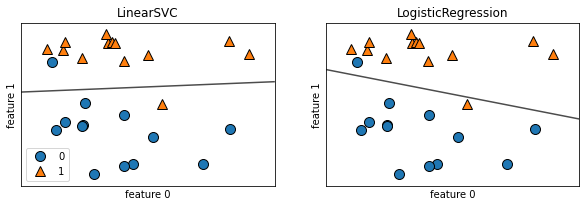

In [2]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

* 기본적으로 L2 규제 사용
* 규제의 강도 결정하는 매개변수: C
* C의 값이 높아지면 규제가 감소

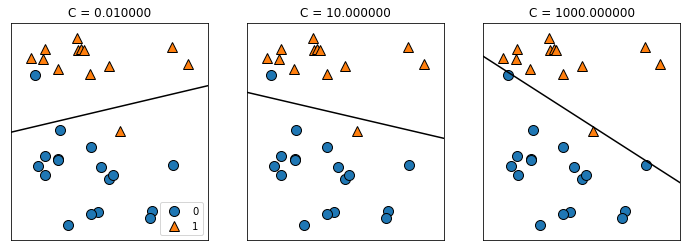

In [3]:
mglearn.plots.plot_linear_svc_regularization()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print('train set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

train set score: 0.958
test set score: 0.958


In [5]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print('train set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

train set score: 0.984
test set score: 0.972


In [6]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print('train set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))

train set score: 0.953
test set score: 0.951


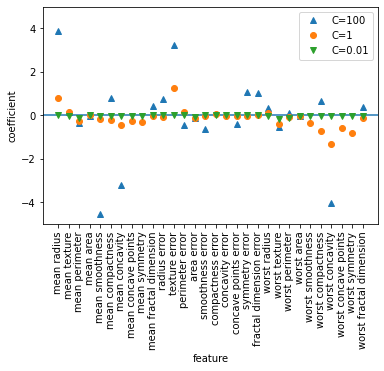

In [7]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.legend()

C=0.001 l1 logistic regression train score: 0.91
C=0.001 l1 logistic regression test score: 0.92
C=1.000 l1 logistic regression train score: 0.96
C=1.000 l1 logistic regression test score: 0.96
C=100.000 l1 logistic regression train score: 0.99
C=100.000 l1 logistic regression test score: 0.98


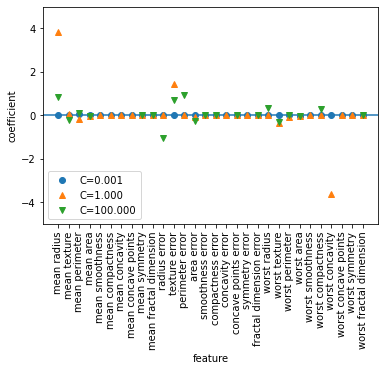

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print('C={:.3f} l1 logistic regression train score: {:.2f}'.format(
        C, lr_l1.score(X_train, y_train)
    ))
    print('C={:.3f} l1 logistic regression test score: {:.2f}'.format(
        C, lr_l1.score(X_test, y_test)
    ))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('feature')
plt.ylabel('coefficient')

plt.ylim(-5, 5)
plt.legend(loc=3)

* 다중 클래스 분류용 선형 모델
    * 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원
    * 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법 - 일대다(one-vs.-rest)

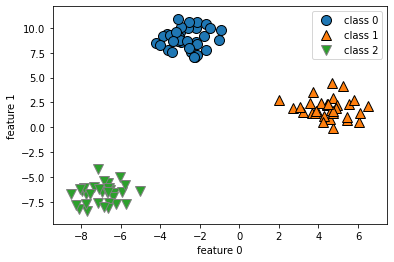

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [10]:
linear_svm = LinearSVC().fit(X, y)
print('coefficient array: ', linear_svm.coef_.shape)
print('intercept aray: ', linear_svm.intercept_.shape)

coefficient array:  (3, 2)
intercept aray:  (3,)


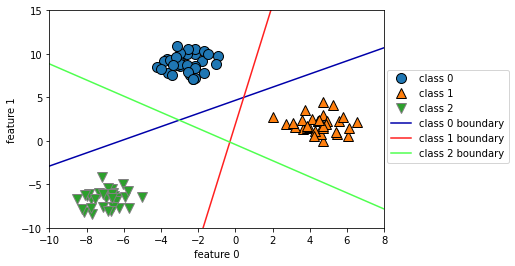

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))

Text(0, 0.5, 'feature 1')

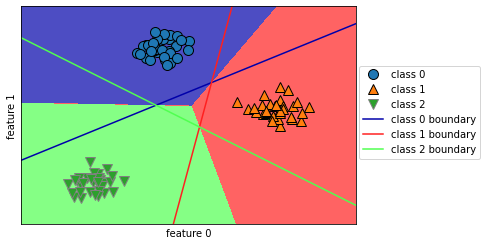

In [12]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

* 장단점과 매개변수
    * 선형 모델의 매개변수
        * 회귀 모델 - alpha
        * LinearSVC, LogisticRegression - C
        * C, alpha 로그 스케일로 최적치 설정
    * 규제
        * L1, L2 정해야 함.
    * 학습 속도가 빠르고 예측도 빠름.
    * 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다.
    * 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있다.
        * 특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때

### 2.3.4 나이브 베이즈 분류기
* 순련 속도 빠른 편이지만, 일반화 성능이 조금 떨어진다.
* 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합

* BernoulliNB 분류기
    * 각 틀래스의 특성 중 0이 아닌 것이 몇 개인지 셈.

In [13]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('feature count:\n{}'.format(counts))

feature count:
{0: array([-90.70533329, 303.81586344]), 1: array([148.48383017,  63.98436414]), 2: array([-229.40641734, -220.31515084])}


* MultinomialNB
    * 틀래스별로 특성의 평균을 계산
* GaussianNB
    * 클래스별로 각 특성의 분산과 평균을 저장.

* 장단점과 매개변수
    * 복잡도 조절하는 alpha
    * 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가.
        * 통계 데이터를 완만하게 만들어 줌.
        * alpha가 크면 더 완만해지고 모델의 복잡도는 낮아짐.
        * alpha에 따른 알고리즘 성능 변동은 비교적 크지 않다.

### 결정 트리

* 결정 트리 만들기
* 결정 트리의 복잡도 제어하기
    * 과대적합 막는 전략
        * 사전 가지치기 (pre-pruning) - 트리 생성을 일찍 중단하는 전략
            * 트리의 최대 깊이나 리프의 최대 개수 제한, 노드가 분할하기 위한 포인트의 최소 개수 지정.
        * (사후) 가지치기 ((post) pruning) - 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략

In [14]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('train set acc: {:.3f}'.format(tree.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(tree.score(X_test, y_test)))

train set acc: 1.000
test set acc: 0.937


In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(tree.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(tree.score(X_test, y_test)))

train set acc: 0.988
test set acc: 0.951


* 결정 트리 분석

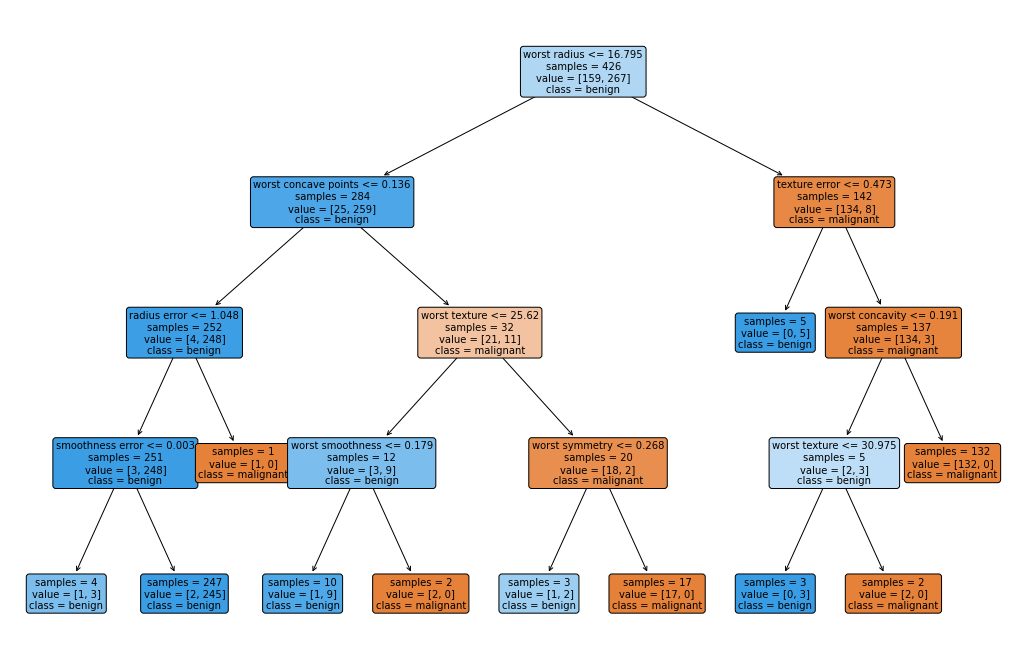

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 12))
plot_tree(tree, class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

* 트리의 특성 중요도 (feature importance)
    * 0과 1 사이의 숫자
    * 0은 전혀 사용되지 않았다는 뜻
    * 1은 완벽하게 타깃 클래스를 예측했다는 뜻.
    * 전체 합은 1

In [17]:
print('feature importance:\n{}'.format(tree.feature_importances_))

feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


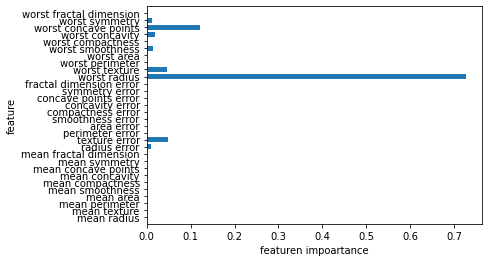

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('featuren impoartance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

* 쳣 번찌 노드에서 사용한 특성이 가장 중요한 특성으로 나타난다.
* 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아니다.
    * 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있다.

Feature importances: [0. 1.]


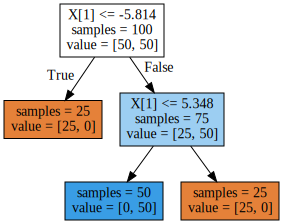

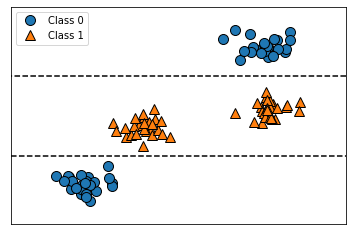

In [19]:
mglearn.plots.plot_tree_not_monotone()

* 회귀를 위한 트리 기반의 모델을 사용 할 때 짚고 넘어가야 할 특별한 속성
    * 외삽 (extrapolation)
        * 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.

Text(0, 0.5, 'price ($/Mbyte)')

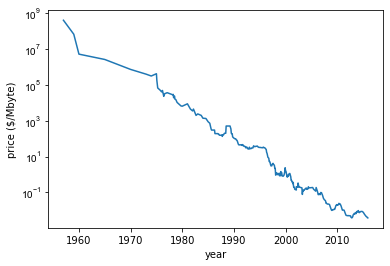

In [21]:
import os
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($/Mbyte)')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

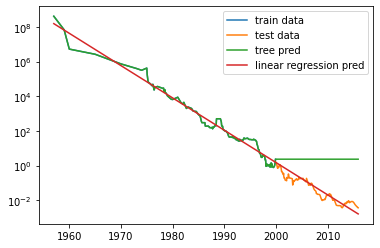

In [25]:
plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree pred')
plt.semilogy(ram_prices.date, price_lr, label='linear regression pred')
plt.legend()

* 장단점과 매개변수
    * 사전 가지치기
        * max_depth, max_leaf_nodes, min_samples_leaf
    * 장점
        * 만들어진 모델을 쉽게 시각화해서 비전문가도 이해하기 쉽다.
        * 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다.
    * 단점
        * 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.